In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn.decomposition import FastICA
from sklearn.feature_selection import SelectPercentile as sp
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv("CNS.csv")    
data

,-60,-109,45,22,7,-61,-211,-102,-20,98,...,1082.1,-12.17,44.14,-48.9,123.8,89.11,-25.11,56.18,-63.8,1.22
0,-159,-113,-62,-16,-160,-395,97,-157,15,-8,...,1295,-677,-452,-750,1273,-1,-750,-45,-293,1
1,-119,-31,4,-11,-197,-541,-277,-166,17,392,...,592,55,88,-37,310,159,11,2,2,1
2,41,9,-256,370,-302,-680,254,31,186,358,...,433,71,-237,-166,52,-48,-183,328,-244,1
3,-165,-57,171,216,-692,-381,762,-6,44,216,...,2160,-120,-82,-25,3888,393,-38,190,38,1
4,-66,-123,57,-84,-129,-100,73,-147,27,10,...,732,88,49,-139,316,71,-28,95,-69,1
5,-28,-42,-142,113,-315,-399,352,-248,104,195,...,410,193,11,35,477,195,-62,117,-6,1
6,-6,238,110,-103,-311,-358,-40,-258,-23,244,...,1160,335,348,-124,1596,600,103,509,23,1
7,-106,-169,-39,170,-113,-286,-478,-86,-70,-113,...,1083,-173,-59,-189,458,231,-220,-80,-278,1
8,-60,-90,25,30,-48,-156,62,-74,33,85,...,224,36,72,60,239,131,-5,53,4,1
9,-26,-27,143,-92,-198,-361,-347,-142,57,343,...,610,-36,13,-79,606,337,-4,253,-24,1


In [3]:
last_row = data["1.22"]
last_row

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
Name: 1.22, dtype: int64

In [4]:
data.drop("1.22", inplace = True, axis = 1)
data

,-60,-109,45,22,7,-61,-211,-102,-20,98,...,-36.14,1082.1,-12.17,44.14,-48.9,123.8,89.11,-25.11,56.18,-63.8
0,-159,-113,-62,-16,-160,-395,97,-157,15,-8,...,129,1295,-677,-452,-750,1273,-1,-750,-45,-293
1,-119,-31,4,-11,-197,-541,-277,-166,17,392,...,-139,592,55,88,-37,310,159,11,2,2
2,41,9,-256,370,-302,-680,254,31,186,358,...,37,433,71,-237,-166,52,-48,-183,328,-244
3,-165,-57,171,216,-692,-381,762,-6,44,216,...,470,2160,-120,-82,-25,3888,393,-38,190,38
4,-66,-123,57,-84,-129,-100,73,-147,27,10,...,229,732,88,49,-139,316,71,-28,95,-69
5,-28,-42,-142,113,-315,-399,352,-248,104,195,...,-4,410,193,11,35,477,195,-62,117,-6
6,-6,238,110,-103,-311,-358,-40,-258,-23,244,...,-375,1160,335,348,-124,1596,600,103,509,23
7,-106,-169,-39,170,-113,-286,-478,-86,-70,-113,...,136,1083,-173,-59,-189,458,231,-220,-80,-278
8,-60,-90,25,30,-48,-156,62,-74,33,85,...,108,224,36,72,60,239,131,-5,53,4
9,-26,-27,143,-92,-198,-361,-347,-142,57,343,...,-80,610,-36,13,-79,606,337,-4,253,-24


In [5]:
data.isnull().sum().sum()

0

In [6]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,-0.524658,-0.180502,-0.567759,-0.716832,0.430151,-0.221187,0.093981,0.035132,-0.306968,-0.751603,...,0.262985,0.535226,-2.828864,-2.272661,-3.799638,0.601361,-1.097632,-3.998639,-0.915234,-1.742032
1,-0.193236,0.503343,-0.030492,-0.684908,0.220782,-0.910268,-0.809630,-0.039191,-0.292896,1.433936,...,-1.263004,-0.757401,0.054206,0.210602,0.404117,-0.737178,-0.374508,0.330424,-0.691094,0.602364
2,1.132453,0.836926,-2.146999,1.747711,-0.373373,-1.566310,0.473304,1.587662,0.896217,1.248165,...,-0.260862,-1.049759,0.117224,-1.283954,-0.356450,-1.095790,-1.310050,-0.773174,0.863584,-1.352624
3,-0.574371,0.286514,1.328957,0.764448,-2.580234,-0.155111,1.700669,1.282111,-0.102919,0.472299,...,2.204636,2.125727,-0.635053,-0.571166,0.474867,4.236128,0.683061,0.051680,0.205469,0.888459
4,0.245898,-0.263898,0.400950,-1.151000,0.605568,1.171133,0.035995,0.117713,-0.222534,-0.653254,...,0.832384,-0.499979,0.184181,0.031255,-0.197262,-0.728838,-0.772226,0.108566,-0.247581,0.038119
5,0.560749,0.411608,-1.218992,0.106811,-0.446935,-0.240066,0.710079,-0.716358,0.319251,0.357558,...,-0.494316,-1.092050,0.597736,-0.143493,0.828620,-0.505053,-0.211805,-0.084848,-0.142664,0.538787
6,0.743032,2.746690,0.832391,-1.272312,-0.424300,-0.046557,-0.237021,-0.798940,-0.574342,0.625287,...,-2.606786,0.286998,1.157020,1.406247,-0.108824,1.050321,1.618603,0.853780,1.726764,0.769253
7,-0.085524,-0.647519,-0.380530,0.470746,0.696106,0.293263,-1.295260,0.621460,-0.905042,-1.325307,...,0.302843,0.145415,-0.843799,-0.465397,-0.492055,-0.531463,-0.049102,-0.983654,-1.082147,-1.622826
8,0.295612,0.011308,0.140457,-0.423130,1.063916,0.906828,0.009419,0.720557,-0.180317,-0.243465,...,0.143411,-1.434053,-0.020628,0.137024,0.976016,-0.835866,-0.501055,0.239405,-0.447877,0.618258
9,0.577321,0.536702,1.101025,-1.202079,0.215123,-0.060717,-0.978755,0.159004,-0.011449,1.166207,...,-0.927059,-0.724304,-0.304208,-0.134296,0.156490,-0.325747,0.429968,0.245094,0.505913,0.395739


In [7]:
def RFC(data, target_row):
    train_x, val_x, train_y, val_y = train_test_split(data, target_row, test_size = 0.2, random_state = 42)
    model_rfc = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=10)    
    model_rfc.fit(train_x, train_y)
    preds = model_rfc.predict(val_x)
    score = accuracy_score(val_y, preds)
    roc_curve_score = roc_auc_score(val_y, preds)
    x, y, _ = roc_curve(val_y, preds)
    pyplot.title("Random forest classifier")
    pyplot.plot(x, y, linestyle='--')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()
    print("ROC score " + str(roc_auc_score(val_y, preds)))
    print("F1 score " + str(f1_score(val_y, preds, average="macro")))
    print("Precision score " + str(precision_score(val_y, preds, average="macro")))
    print("Recall score " + str(recall_score(val_y, preds, average="macro")))  
    print(confusion_matrix(val_y, preds))
    return score

In [8]:
def DTC(data, target_row):
    train_x, val_x, train_y, val_y = train_test_split(data, target_row, test_size = 0.3, random_state = 42)
    model_dtc = DecisionTreeClassifier(max_depth=100, random_state=42)
    model_dtc.fit(train_x, train_y)
    preds = model_dtc.predict(val_x)
    score = accuracy_score(val_y, preds)
    roc_curve_score = roc_auc_score(val_y, preds)
    x, y, _ = roc_curve(val_y, preds)
    pyplot.title("Decision tree classifier")
    pyplot.plot(x, y, linestyle='--')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()
    print("ROC score " + str(roc_auc_score(val_y, preds)))
    print("F1 score " + str(f1_score(val_y, preds, average="macro")))
    print("Precision score " + str(precision_score(val_y, preds, average="macro")))
    print("Recall score " + str(recall_score(val_y, preds, average="macro")))
    print(confusion_matrix(val_y, preds))
    return score

In [9]:
def KNN(data, target_row):
    train_x, val_x, train_y, val_y = train_test_split(data, target_row, test_size = 0.2, random_state = 42)
    model_knn = KNeighborsClassifier(n_neighbors=30, n_jobs=-1)
    model_knn.fit(train_x, train_y)
    preds = model_knn.predict(val_x)
    score = accuracy_score(val_y, preds)
    roc_curve_score = roc_auc_score(val_y, preds)
    x, y, _ = roc_curve(val_y, preds)
    pyplot.title("K Nearest Neighbor")
    pyplot.plot(x, y, linestyle='--')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.show()
    print("ROC score " + str(roc_auc_score(val_y, preds)))
    print("F1 score " + str(f1_score(val_y, preds, average="macro")))
    print("Precision score " + str(precision_score(val_y, preds, average="macro")))
    print("Recall score " + str(recall_score(val_y, preds, average="macro")))
    print(confusion_matrix(val_y, preds))
    return score

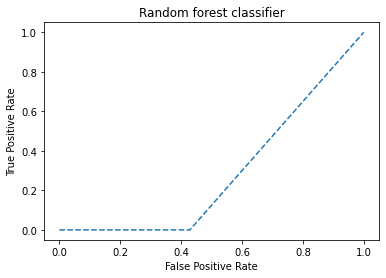

ROC score 0.2857142857142857
F1 score 0.25
Precision score 0.2222222222222222
Recall score 0.2857142857142857
[[4 3]
 [5 0]]
Accuracy score is 0.3333333333333333


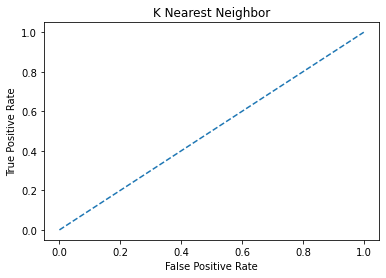

ROC score 0.5
F1 score 0.3684210526315789
Precision score 0.2916666666666667
Recall score 0.5
[[7 0]
 [5 0]]
Accuracy score is 0.5833333333333334


C:\Users\Srilahari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


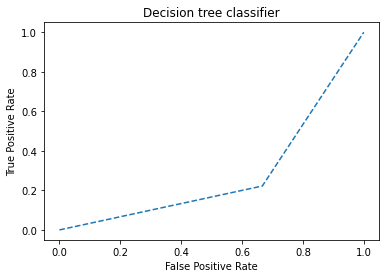

ROC score 0.2777777777777778
F1 score 0.27554179566563464
Precision score 0.275
Recall score 0.2777777777777778
[[3 6]
 [7 2]]
Accuracy score is 0.2777777777777778


In [10]:
print("Accuracy score is " + str(RFC(data, last_row)))
print("Accuracy score is " + str(KNN(data, last_row)))
print("Accuracy score is " + str(DTC(data, last_row)))

In [11]:
pca = decomposition.PCA(n_components=30, random_state=42)
data_pca = pca.fit_transform(data)
data_pca = pd.DataFrame(data_pca)
data_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.083162,-11.033074,4.526238,-6.535529,-40.738117,-7.110053,24.105067,3.375386,1.808539,-0.819440,...,24.558629,-21.813954,14.477751,21.267889,-7.181915,17.991080,-5.635655,-8.750120,12.440434,6.851085
1,-26.194081,-1.607992,-5.193036,2.126833,6.551559,3.882310,-2.155970,2.619048,9.402309,-6.392663,...,1.237178,2.988587,3.174855,0.348976,-0.759243,-2.509254,5.471636,6.707668,-5.894522,9.006178
2,-38.712513,19.680088,-8.513236,4.317591,-6.641438,1.347406,12.890017,5.193974,13.798981,-0.439261,...,26.017378,17.752041,3.609649,7.091830,3.643990,-3.985609,-6.967354,-8.676267,-5.984931,6.557973
3,14.456403,27.325303,65.167929,-19.961109,11.722996,-65.045226,-24.939508,70.097859,9.242292,-6.037462,...,-1.210437,3.036451,-0.176765,-0.555996,1.963140,0.160903,-3.489542,-0.020605,-2.513116,0.062672
4,-34.885037,-11.175974,6.408497,0.120945,7.356120,-1.335618,-4.171800,-4.816191,2.926534,3.158769,...,-6.709146,1.442022,1.305743,1.191275,-2.853019,-1.487440,3.186806,1.228409,-1.108897,2.460221
5,-27.249071,-2.237056,1.241074,5.723162,14.224287,2.563001,0.167180,-4.597725,4.517481,-2.761861,...,-0.233082,-0.421397,-2.132849,1.009508,0.008452,-4.525438,-7.688978,-0.400890,-5.271830,-4.792363
6,2.333194,31.640111,-27.631639,-1.201334,9.107514,9.105201,0.218210,16.383389,-0.201366,-12.532440,...,7.202427,-4.825673,13.813476,2.165210,-9.031771,-8.100515,-5.397365,-2.521603,1.923383,0.574566
7,-1.953964,-23.927788,1.948914,-1.031966,-21.186456,-1.640991,10.778943,6.251704,-1.575328,-2.760808,...,-5.482708,6.306426,-1.877083,-9.385424,-0.762195,-5.332458,0.904022,2.284149,2.885053,-1.932783
8,-53.762425,-15.693184,7.942362,2.463380,-0.484145,-0.386839,3.097578,-6.565255,8.151697,1.221662,...,-6.369465,-0.825044,3.904932,-3.241057,-0.831444,-1.006617,2.259050,0.553438,2.670614,0.458369
9,-31.510742,0.581226,-2.521521,-0.662141,-2.392913,-2.672043,3.766790,-2.776000,1.695016,-1.654016,...,-4.493556,5.200038,0.649420,2.476996,2.790067,-7.070444,-2.749933,2.692843,1.495211,-2.849707


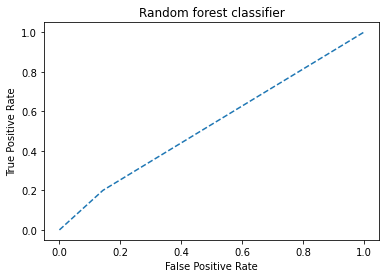

ROC score 0.5285714285714286
F1 score 0.4957983193277311
Precision score 0.55
Recall score 0.5285714285714286
[[6 1]
 [4 1]]
Accuracy score is 0.5833333333333334


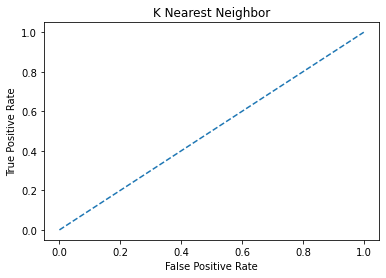

ROC score 0.5
F1 score 0.3684210526315789
Precision score 0.2916666666666667
Recall score 0.5
[[7 0]
 [5 0]]
Accuracy score is 0.5833333333333334


C:\Users\Srilahari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


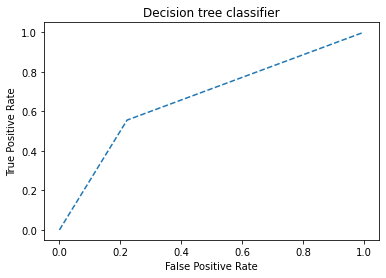

ROC score 0.6666666666666667
F1 score 0.6625000000000001
Precision score 0.6753246753246753
Recall score 0.6666666666666667
[[7 2]
 [4 5]]
Accuracy score is 0.6666666666666666


In [12]:
print("Accuracy score is " + str(RFC(data_pca, last_row)))
print("Accuracy score is " + str(KNN(data_pca, last_row)))
print("Accuracy score is " + str(DTC(data_pca, last_row)))

In [13]:
ica = FastICA(n_components=40, random_state=42)
data_ica = ica.fit_transform(data)
data_ica = pd.DataFrame(data_ica)

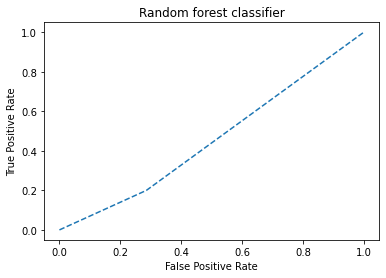

ROC score 0.45714285714285713
F1 score 0.43750000000000006
Precision score 0.4444444444444444
Recall score 0.4571428571428572
[[5 2]
 [4 1]]
Accuracy score is 0.5


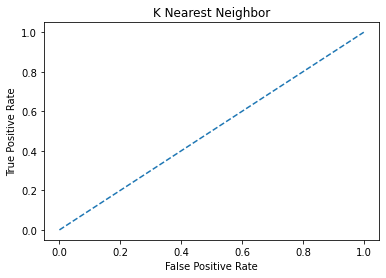

ROC score 0.5
F1 score 0.3684210526315789
Precision score 0.2916666666666667
Recall score 0.5
[[7 0]
 [5 0]]
Accuracy score is 0.5833333333333334


C:\Users\Srilahari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


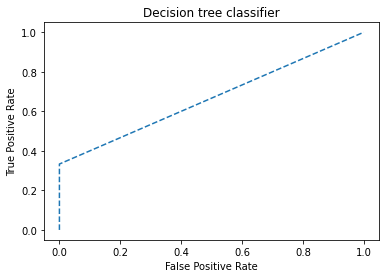

ROC score 0.6666666666666666
F1 score 0.625
Precision score 0.8
Recall score 0.6666666666666666
[[9 0]
 [6 3]]
Accuracy score is 0.6666666666666666


In [14]:
print("Accuracy score is " + str(RFC(data_ica, last_row)))
print("Accuracy score is " + str(KNN(data_ica, last_row)))
print("Accuracy score is " + str(DTC(data_ica, last_row)))

In [15]:
mi = sp(percentile=50)
data_mi = mi.fit(data, last_row)
data_mi = mi.transform(data)
data_mi = pd.DataFrame(data_mi)

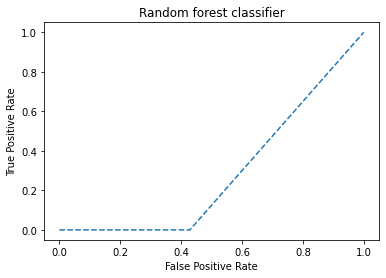

ROC score 0.2857142857142857
F1 score 0.25
Precision score 0.2222222222222222
Recall score 0.2857142857142857
[[4 3]
 [5 0]]
Accuracy score is 0.3333333333333333


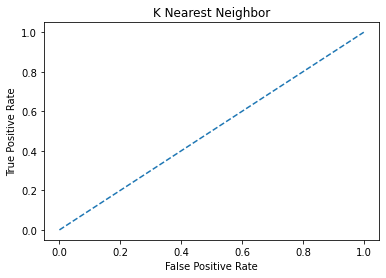

ROC score 0.5
F1 score 0.3684210526315789
Precision score 0.2916666666666667
Recall score 0.5
[[7 0]
 [5 0]]
Accuracy score is 0.5833333333333334


C:\Users\Srilahari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


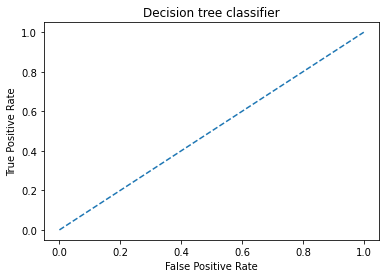

ROC score 0.5
F1 score 0.48571428571428577
Precision score 0.5
Recall score 0.5
[[6 3]
 [6 3]]
Accuracy score is 0.5


In [16]:
print("Accuracy score is " + str(RFC(data_mi, last_row)))
print("Accuracy score is " + str(KNN(data_mi, last_row)))
print("Accuracy score is " + str(DTC(data_mi, last_row)))